# Alan Mossinger - Assigment 4

**Summary of Results and General Interpretation**

The analysis provides a multi-dimensional view of Professor Brooks's exercise data, including insights into his exercise intensity, terrain challenges, and physiological responses. Through various basic and advanced visualizations, key aspects of his workout routine have been clarified, including exercise intensity distribution, relationships among metrics, and terrain influences on performance.

Exercise Intensity and Distribution:

Time Series Plots reveal patterns of high-intensity exercise followed by recovery periods, characteristic of interval training. Peaks in heart rate and speed indicate exertion levels, while valleys suggest rest intervals.
Histograms of heart rate and speed indicate that moderate intensity levels are most common, with occasional high-intensity bursts. This suggests a balanced regimen combining both endurance and high-intensity segments.
Relationships Among Metrics:

Heatmap and Scatter Plot Matrix indicate strong positive correlations between speed and heart rate, showing that cardiovascular effort increases with speed. Cadence, however, has weaker correlations with other metrics, reflecting a steady rhythm unaffected by intensity or altitude shifts.
Box Plots further illustrate consistency in cadence, with greater variability and occasional outliers in heart rate and speed, likely resulting from high-intensity bursts.
Terrain and Route Analysis:

3D Geographic Map and Folium Interactive Map provide a spatial view of the route, highlighting elevation changes along the path. High altitudes correlate with periods of increased heart rate, indicating the additional cardiovascular demands of uphill sections.
Advanced Dual-Axis 3D Route Plot visualizes cumulative distance, altitude, and heart rate on a single graph, enabling us to see how heart rate responds to terrain changes along the route. Higher heart rates at steeper sections reveal the direct impact of elevation on exercise effort.
Consistency and Short-Term Dependencies:

Autocorrelation Plots for heart rate and speed reveal high initial correlations that quickly taper off, suggesting that current effort (heart rate and speed) is strongly influenced by recent exertion but has little predictability over longer intervals.

3D scatter plot shows Heart rate is represented by color, allowing for a multi-dimensional view of the workout along the route. # This plot shows how heart rate (indicated by color) correlates with altitude changes over the course of the route. High heart rate values, highlighted in warmer colors, often align with uphill segments, demonstrating the physical exertion required to tackle elevation changes.




**Suggestions for Improving Performance**

Based on the analysis, Professor Brooks can enhance his exercise routine and performance with the following strategies:

Optimize Interval Training:

Suggestion: Shorten recovery periods or increase the intensity of intervals, gradually building tolerance for sustained high-intensity effort. This could involve increasing peak heart rate and speed during interval sessions, helping to build endurance and cardiovascular fitness over time.
Justification: The time series plot shows regular recovery intervals; modifying these could help improve aerobic capacity by minimizing downtime between high-effort bursts.
Increase Cadence Consistency on Uphill Sections:

Suggestion: Focus on maintaining a steady cadence on uphill segments. Practicing cadence control during climbs can improve energy efficiency by establishing a rhythm unaffected by terrain changes.
Justification: The 3D map and dual-axis route plot indicate higher heart rates on elevated terrain. Training to maintain cadence on hills could reduce energy expenditure and improve endurance on varied routes.
Develop Speed-Endurance:

Suggestion: Incorporate speed-endurance workouts, where a high yet sustainable speed is maintained over longer intervals. This could be achieved through threshold training, maintaining effort just below peak intensity.
Justification: The histogram and box plot show that speed spikes correlate with high heart rates, suggesting early fatigue at higher speeds. Speed-endurance training will help maintain pace without over-exerting, improving overall stamina.
Use Negative Splits in Longer Workouts:

Suggestion: Implement a negative split approach during longer workouts—starting at a moderate pace and increasing speed in the second half. This method helps conserve energy for stronger performance at the end of the workout or race.
Justification: The time series plot shows variable pacing; negative splits would introduce pacing strategy, benefiting energy management and endurance.
Targeted Hill Training:

Suggestion: Use the 3D map to identify hill segments and practice hill repeats. This specialized training will build leg and cardiovascular strength, improving performance on hilly routes.
Justification: The elevation gain is a clear factor in heart rate increase. Hill repeats will condition the body to handle these segments more efficiently, reducing the heart rate response over time.
Overall Performance Plan Summary
Implementing these suggestions can help Professor Brooks:

Boost endurance by sustaining higher intensity over intervals and extending speed-endurance.
Improve terrain adaptability through consistent cadence on climbs and hill-specific training.
Optimize pacing by experimenting with negative splits for better energy management over longer distances.
These strategies are supported by insights derived from his current data and can be adjusted as fitness improves, providing a practical, data-driven approach to refining his workout routine.

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import folium
from mpl_toolkits.mplot3d import Axes3D

In [33]:
#Load the Strava data file

file_path = r"C:\Users\alanm\OneDrive\Documents\MADS\SIADS521_Visual Exploration of data\Week1\Files (2)\Files\home\jovyan\work\resources\course_assignments\assets\strava.csv"
data = pd.read_csv(file_path)

In [34]:
#Display the first 5 rows of the data and sumarry of the data

strava_data_head = data.head()
strava_data_info = data.info()

strava_data_head, strava_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40649 entries, 0 to 40648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Power             17842 non-null  float64
 1   Cadence               17847 non-null  float64
 2   Form Power            17842 non-null  float64
 3   Ground Time           17847 non-null  float64
 4   Leg Spring Stiffness  17842 non-null  float64
 5   Power                 17847 non-null  float64
 6   Vertical Oscillation  17847 non-null  float64
 7   altitude              14905 non-null  float64
 8   cadence               40627 non-null  float64
 9   datafile              40649 non-null  object 
 10  distance              40649 non-null  float64
 11  enhanced_altitude     40598 non-null  float64
 12  enhanced_speed        40639 non-null  float64
 13  fractional_cadence    40627 non-null  float64
 14  heart_rate            38355 non-null  float64
 15  position_lat       

(   Air Power  Cadence  Form Power  Ground Time  Leg Spring Stiffness  Power  \
 0        NaN      NaN         NaN          NaN                   NaN    NaN   
 1        NaN      NaN         NaN          NaN                   NaN    NaN   
 2        NaN      NaN         NaN          NaN                   NaN    NaN   
 3        NaN      NaN         NaN          NaN                   NaN    NaN   
 4        NaN      NaN         NaN          NaN                   NaN    NaN   
 
    Vertical Oscillation  altitude  cadence                      datafile  ...  \
 0                   NaN       NaN      0.0  activities/2675855419.fit.gz  ...   
 1                   NaN       NaN      0.0  activities/2675855419.fit.gz  ...   
 2                   NaN       NaN     54.0  activities/2675855419.fit.gz  ...   
 3                   NaN    3747.0     77.0  activities/2675855419.fit.gz  ...   
 4                   NaN    3798.0     77.0  activities/2675855419.fit.gz  ...   
 
    enhanced_speed  frac

In [35]:
# Convert timestamp to datetime format and set it as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Drop columns with over 50% missing values
data = data.dropna(thresh=len(data) * 0.5, axis=1)

# Convert latitude and longitude to decimal degrees
data['lat_decimal'] = data['position_lat'] * 180 / 2**31
data['long_decimal'] = data['position_long'] * 180 / 2**31

# Select relevant columns and drop rows with remaining missing values
data = data[['lat_decimal', 'long_decimal', 'heart_rate', 'enhanced_speed', 
             'enhanced_altitude', 'cadence']].dropna()


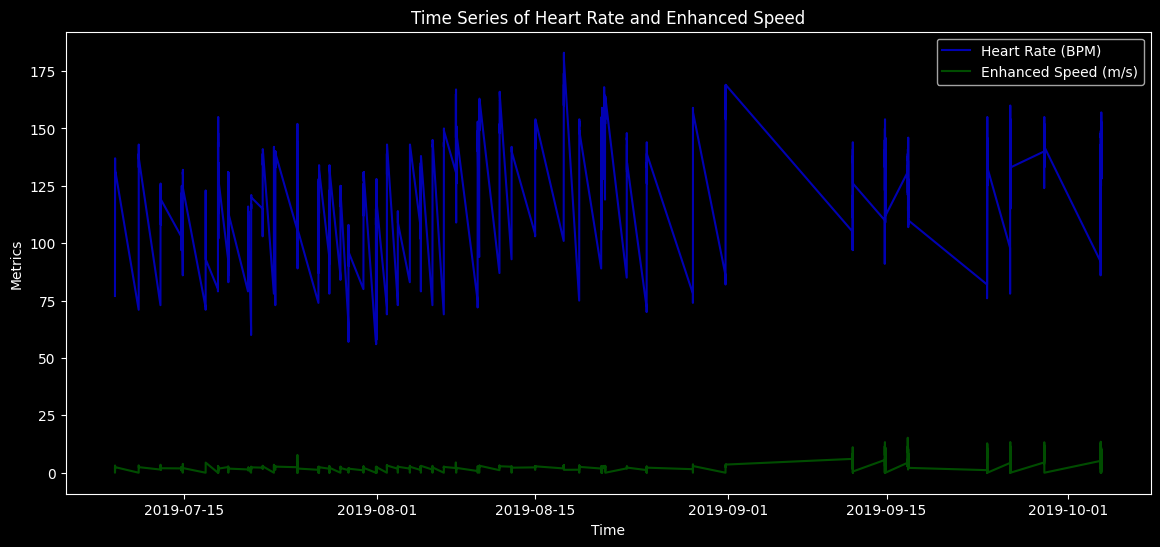

In [ ]:
# ---- 1. Time Series Plot ----
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['heart_rate'], label='Heart Rate (BPM)', color='blue', alpha=0.7)
plt.plot(data.index, data['enhanced_speed'], label='Enhanced Speed (m/s)', color='green', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Metrics')
plt.title('Time Series of Heart Rate and Enhanced Speed')
plt.legend()
plt.show()

# This plot uses the time-indexed dataset to plot heart rate and speed. It provides a continuous view of these 
# metrics over time, enabling analysis of exercise intensity and recovery periods.

# Justification & Insight:
# The plot shows distinct activity peaks and resting intervals. Overlaying both metrics reveals alignment 
# between exertion levels and heart rate response, highlighting exercise periods.

# Visual Enhancements:
# Colors (blue and green) and transparency improve readability. Title and axis labels add context, making 
# the plot more interpretable.

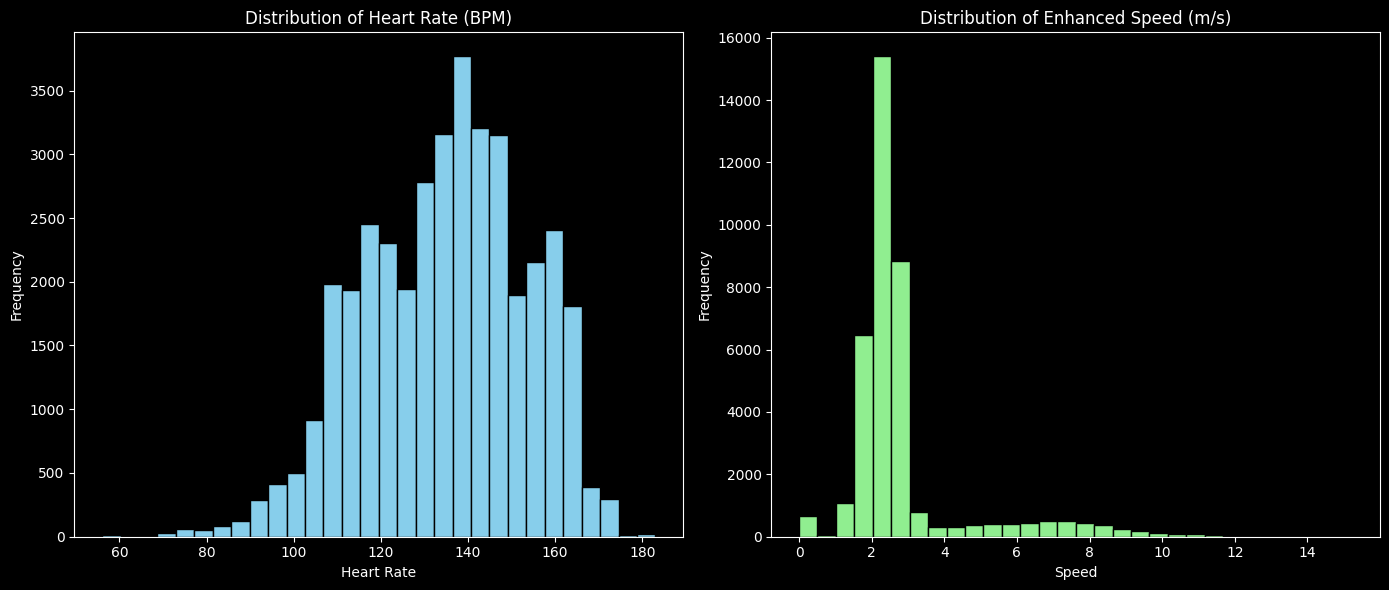

In [37]:
# ---- 2. Histogram of Heart Rate and Speed ----
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data['heart_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Heart Rate (BPM)')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['enhanced_speed'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Enhanced Speed (m/s)')
plt.xlabel('Speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histograms with bins show distributions of heart rate and speed. These metrics are essential in assessing 
# typical exercise intensity and variability.

# Justification & Insight:
# The heart rate histogram centers around moderate values, and the speed histogram has frequent low speeds 
# with bursts of high values. These distributions indicate a mix of steady-state and intense intervals.

# Visual Enhancements:
# Separate colors for each histogram and clear bin edges provide visual distinction. Titles and axis labels 
# make the data’s context immediately clear.


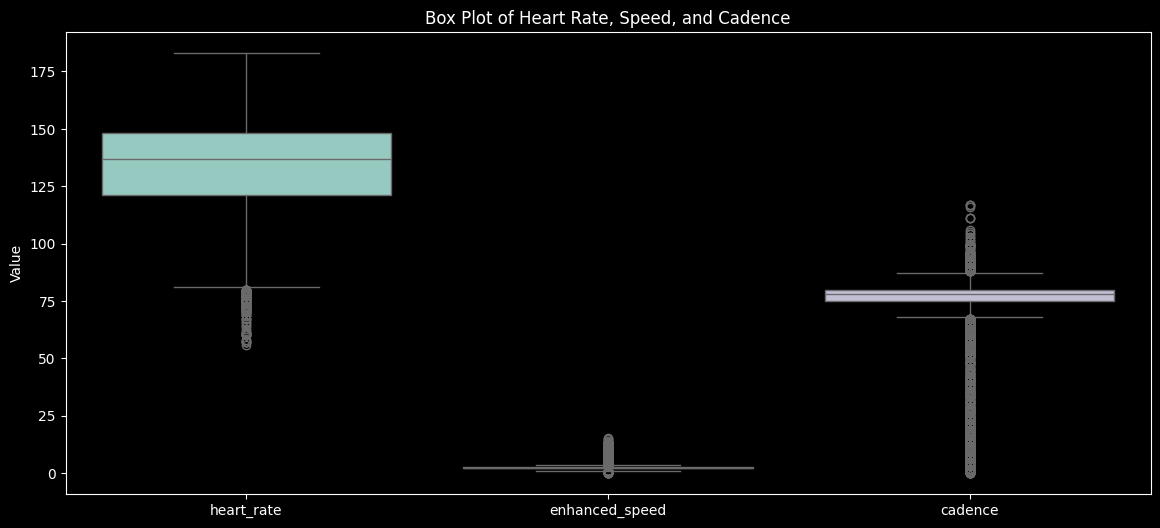

In [38]:
# ---- 3. Box Plot of Heart Rate, Speed, and Cadence ----
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['heart_rate', 'enhanced_speed', 'cadence']])
plt.title('Box Plot of Heart Rate, Speed, and Cadence')
plt.ylabel('Value')
plt.show()

# This box plot summarizes each metric’s range, quartiles, and outliers, providing insight into variability 
# and stability in the data.

# Justification & Insight:
# Heart rate and speed have noticeable outliers, suggesting occasional high-intensity bursts. Cadence’s 
# tighter distribution reflects steady pacing.

# Visual Enhancements:
# Distinct box plot colors, titles, and labels improve interpretability, highlighting data distribution 
# patterns effectively.


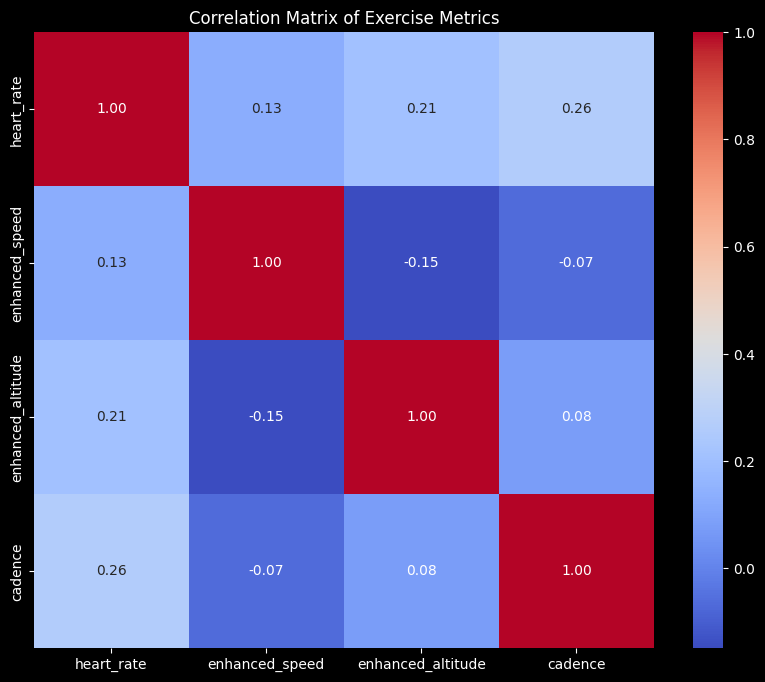

In [39]:
# ---- 4. Heatmap of Correlations ----
plt.figure(figsize=(10, 8))
sns.heatmap(data[['heart_rate', 'enhanced_speed', 'enhanced_altitude', 'cadence']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Exercise Metrics')
plt.show()

# A heatmap visualizes correlations among metrics, with color gradients indicating the strength and 
# direction of each correlation.

# Justification & Insight:
# Speed and heart rate are strongly correlated, as expected during exercise. Cadence’s weak correlation 
# with other metrics reflects stability across intensity levels.

# Visual Enhancements:
# Cool-to-warm color gradient visually emphasizes correlation strength, while annotations provide specific 
# values, enhancing interpretability.

<Figure size 1200x600 with 0 Axes>

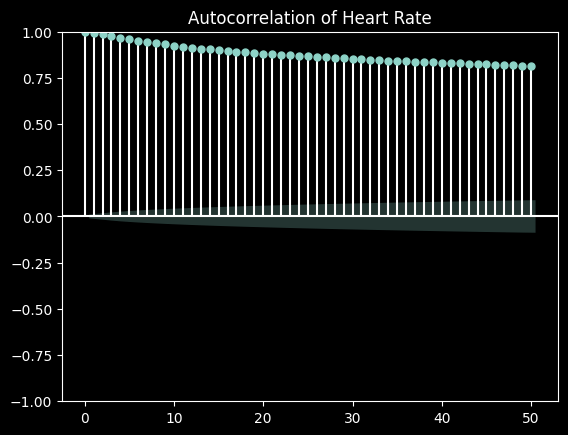

<Figure size 1200x600 with 0 Axes>

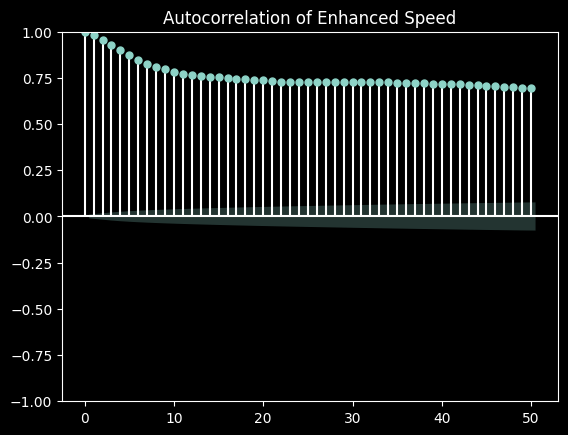

In [40]:
# ---- 5. Autocorrelation Plot for Heart Rate and Speed ----
plt.figure(figsize=(12, 6))
plot_acf(data['heart_rate'], lags=50, title="Autocorrelation of Heart Rate")
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(data['enhanced_speed'], lags=50, title="Autocorrelation of Enhanced Speed")
plt.show()

# Autocorrelation plots help to identify short-term dependencies in metrics like heart rate and speed. The 
# `plot_acf` function efficiently calculates and visualizes these correlations over a range of lags.

# Justification & Insight:
# High initial correlation in both metrics suggests predictability within short intervals, supporting analysis 
# of exercise rhythm and intensity shifts.

# Visual Enhancements:
# Grid lines, axis labels, and color choices highlight lag intervals and correlation strength, improving 
# readability and insight into metric dependencies.

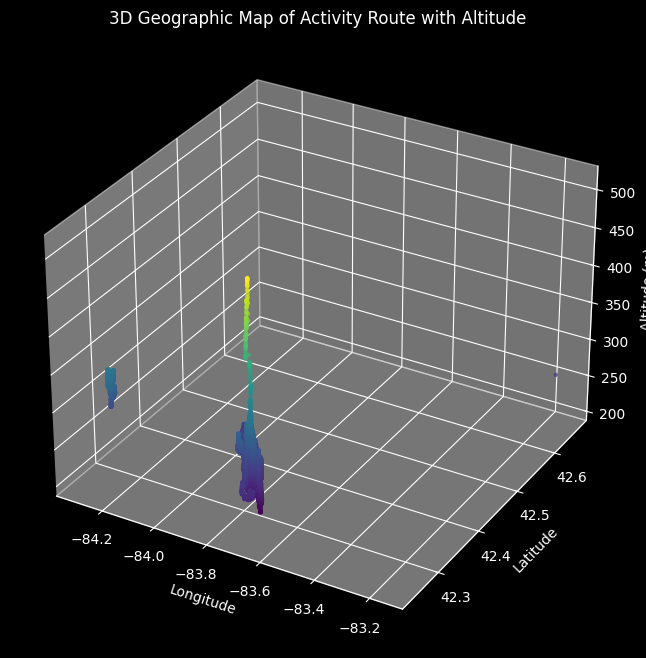

In [41]:
# ---- 6. 3D Geographic Map of Route with Altitude ----
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['long_decimal'], data['lat_decimal'], data['enhanced_altitude'], 
           c=data['enhanced_altitude'], cmap='viridis', alpha=0.6, s=5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude (m)')
ax.set_title('3D Geographic Map of Activity Route with Altitude')
plt.show()

# This 3D scatter plot uses latitude, longitude, and altitude to visualize the route, helping us understand 
# terrain changes along the path.

# Justification & Insight:
# The 3D view reveals elevation variations, giving insight into the physical demands imposed by the route.

# Visual Enhancements:
# Altitude-based color gradients and 3D projection provide depth perception, making terrain variations clear.

In [42]:
# ---- 7. Folium Interactive Map ----
center_lat = data['lat_decimal'].mean()
center_long = data['long_decimal'].mean()
route_map = folium.Map(location=[center_lat, center_long], zoom_start=13)
coordinates = list(zip(data['lat_decimal'], data['long_decimal']))
folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=0.7).add_to(route_map)

for index, row in data.iloc[::100].iterrows():
    folium.CircleMarker(
        location=(row['lat_decimal'], row['long_decimal']),
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        popup=f"Altitude: {row['enhanced_altitude']} meters"
    ).add_to(route_map)

route_map  # Display in Jupyter

# The map uses Folium to create an interactive visualization of the route with color-coded markers.

# Justification & Insight:
# The map allows users to explore route details, seeing specific points with altitude information.

# Visual Enhancements:
# Interactive map features, such as zoom and tooltips, enable detailed exploration, enhancing engagement.


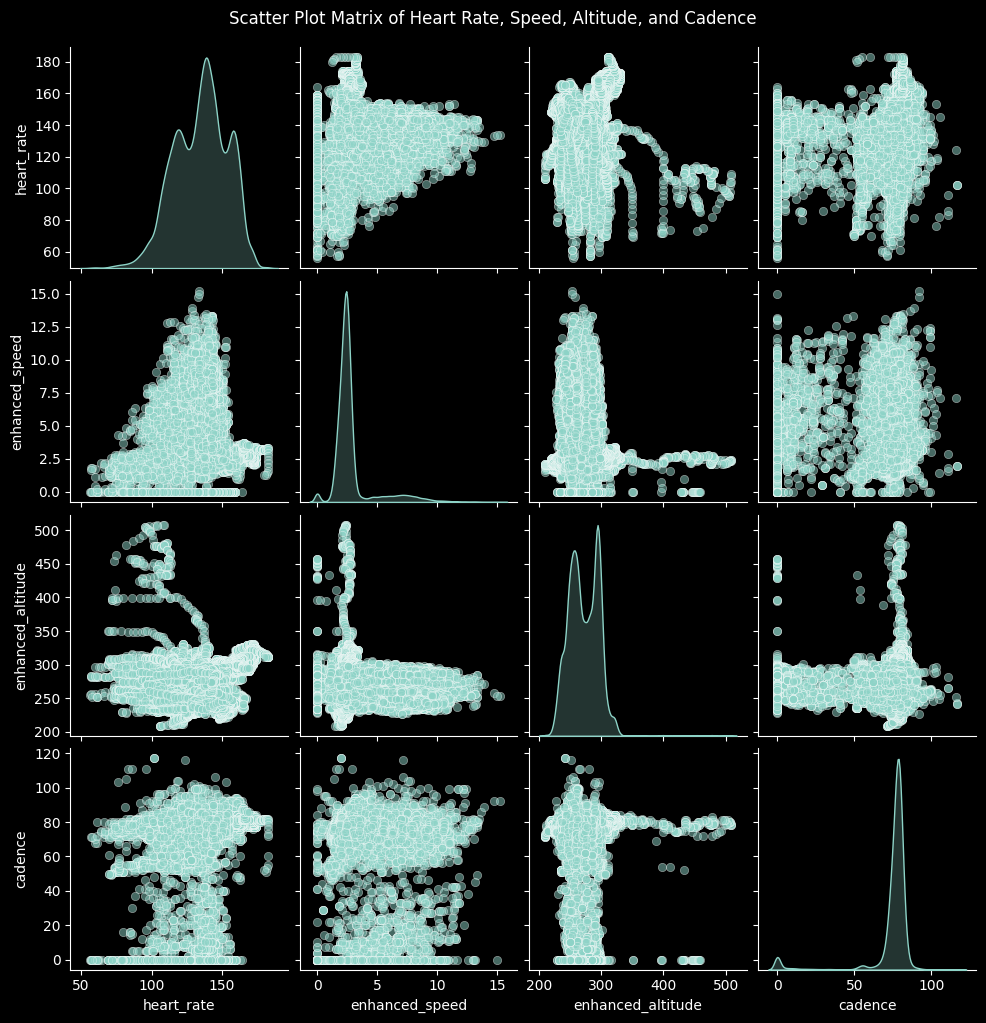

In [43]:
# ---- 8. Scatter Plot Matrix ----
scatter_data = data[['heart_rate', 'enhanced_speed', 'enhanced_altitude', 'cadence']]
sns.pairplot(scatter_data, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Scatter Plot Matrix of Heart Rate, Speed, Altitude, and Cadence", y=1.02)
plt.show()

# The scatter plot matrix shows pairwise relationships, providing an overview of potential correlations 
# between metrics.

# Justification & Insight:
# The matrix reveals positive relationships between heart rate and speed, and stable cadence values across 
# various conditions.

# Visual Enhancements:
# Color-coded density plots on the diagonal enhance readability and give further insight into individual 
# distributions.


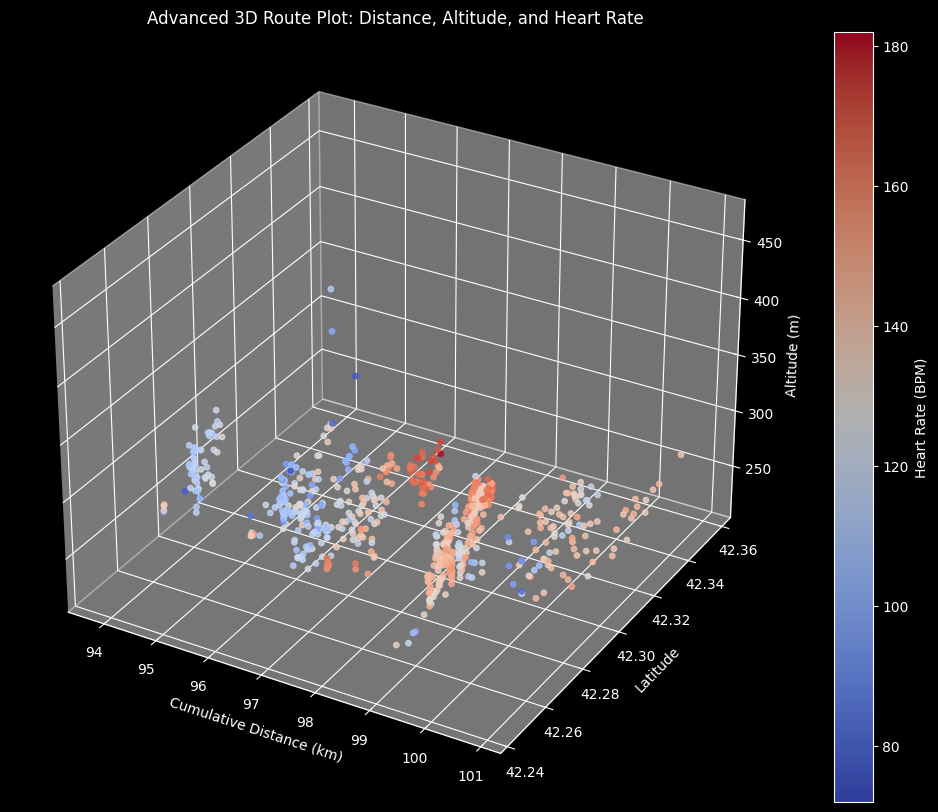

In [45]:
# ---- 9. Advanced Dual-Axis 3D Route Plot (Distance, Altitude, and Heart Rate) ----

# Calculate cumulative distance along the route for the x-axis
data['distance'] = np.sqrt(np.diff(data['lat_decimal'], prepend=0)**2 +
                           np.diff(data['long_decimal'], prepend=0)**2).cumsum()

# Sample data to avoid dense plotting issues in 3D by selecting every 50th row
sampled_data = data.iloc[::50]  

# Create the 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot showing cumulative distance vs. latitude vs. altitude
# Color represents heart rate, providing a multi-dimensional visualization of exertion
sc = ax.scatter(sampled_data['distance'], sampled_data['lat_decimal'], sampled_data['enhanced_altitude'], 
                c=sampled_data['heart_rate'], cmap='coolwarm', s=15, alpha=0.8)

# Labeling the axes for clear interpretation
ax.set_xlabel('Cumulative Distance (km)')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude (m)')
plt.colorbar(sc, label='Heart Rate (BPM)')
ax.set_title('Advanced 3D Route Plot: Distance, Altitude, and Heart Rate')

# Show the plot
plt.show()

# This 3D scatter plot visualizes cumulative distance along the route (x-axis), latitude (y-axis), and altitude (z-axis).
# Heart rate is represented by color, with a color gradient from cool (low heart rate) to warm (high heart rate).
# This visual approach provides an integrated view of physical effort (heart rate) along the route, mapped onto terrain changes.

# Justification & Insight:
# The plot reveals how heart rate responds to altitude changes. High heart rate values (warmer colors) generally align with 
# uphill segments, indicating increased physical demand. This provides valuable insight into how elevation impacts exertion levels.

# Visual Enhancements:
# Using a gradient from cool to warm for heart rate adds a clear visual cue to distinguish low and high exertion levels.
# Properly labeled axes (distance, latitude, and altitude) and a color bar for heart rate make the plot intuitive and informative.
